In [1]:
%matplotlib inline
import os
import sys
import platform
import matplotlib
import pandas as pd
import numpy as np
import scipy as sp
import statsmodels.api as sm
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import matplotlib.ticker as tick
from matplotlib.backends.backend_pdf import PdfPages
from datetime import datetime,timedelta
#from pylab import rcParams

#rcParams['figure.figsize'] = 10, 10

In [2]:
print("Operating System " + platform.system() + " " + platform.release())
print("Python Version " + str(sys.version))
print("Pandas Version " + str(pd.__version__))
print("Numpy Version " + str(np.__version__))
print("Scipy Version " + str(sp.__version__))
print("Matplotlib Version " + str(matplotlib.__version__))

Operating System Windows 10
Python Version 2.7.11 |Anaconda 2.4.1 (64-bit)| (default, Dec  7 2015, 14:10:42) [MSC v.1500 64 bit (AMD64)]
Pandas Version 0.17.1
Numpy Version 1.10.1
Scipy Version 0.16.0
Matplotlib Version 1.5.0


https://github.com/PESTools/pestools

http://docs.scipy.org/doc/scipy/reference/tutorial/optimize.html

In [3]:
def Theis(dist, T, S, pump, t):
    if t <= 0:
        return 0
    else:
        u = (np.power(dist,2)*S)/(4*T*t)
        qpart = (pump/(4.0*np.pi*T))
        lnpart = (-0.5772-np.log(u)+u-(np.power(u,2)/(2.0*np.math.factorial(2)))+(np.power(u,3)/(3*np.math.factorial(3)))-(np.power(u,4)/(4*np.math.factorial(4))))
        return qpart*lnpart

def pumprec(dist,T,S,pump,t,t1,t2):
    return Theis(dist,T,S,pump,t-t1) + Theis(dist,T,S,-1*pump,t-t2)

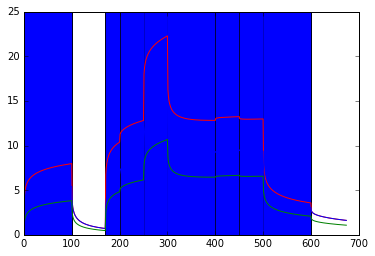

In [6]:

T = 1000
S = 0.001
dist = 100

rates = [10000,14000,12000,2000,500]
starts = [0,170,250,200,400]
ends = [100,300,500,600,450]
label = [10000,14000,12000,2000,500]
timesteps = np.arange(0,ends[-1]*1.5,1)  

h,g,i = [],[],[]


def TheisPlot(T,S,dist,col):
    h = []
    for t in timesteps:
        pint = 0
        for i in range(len(rates)):
            pint1 = pumprec(dist,T,S,rates[i],t,starts[i],ends[i])
            pint = pint + pint1
            plt.axvspan(starts[i],ends[i],label=str(label[i]),alpha=0.7)
        h.append(pint)
    plt.plot(timesteps, h, color=col)

TheisPlot(1000,0.001,100, 'red')    
TheisPlot(1000,0.001,500, 'blue')
TheisPlot(1500,0.001,500, 'green')

#plt.scatter(timesteps, Theis(dist,T,S,-1*pump,timesteps-dur)+Theis(dist,T,S,pump,timesteps), color='red')
#plt.ylim(0,1)

In [8]:
print(len(timesteps))

1000
